# Layer Explaination

In [22]:
import tensorflow as tf

## Input Image  
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드  
- os
- glob
- matplotlib

In [23]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [25]:
train_x.shape

(60000, 28, 28)

In [26]:
image = train_x[0]

이미지를 열어봤으니 무엇을 확인 해볼까요?

In [27]:
# 이미지 shape 확인
image.shape

(28, 28)

차원 수를 확인 했는데 어떤 결과가 나왔나요? 

[batch_size, height, width, channel]

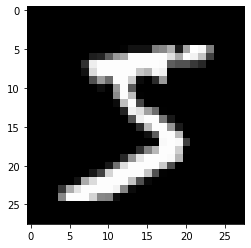

In [28]:
# 차원 수 높이기 
plt.imshow(image, 'gray')

In [29]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Feature Extraction

![feature_extract.png](image/feature_extract.png)

## Convolution

![convolution.png](image/convolution.png)

filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)  
kernel_size: filter(Weight)의 사이즈  
strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [30]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='SAME', activation='relu')

(3, 3) 대신에 3으로도 대체 가능

In [31]:
tf.keras.layers.Conv2D(3, 3, 1, 'SAME')

### Visualization

- tf.keras.layers.Conv2D

In [32]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [33]:
layer = tf.keras.layers.Conv2D(3, 3, strides=(1, 1), padding='SAME')
layer

In [34]:
output = layer(image)

In [35]:
output

<tf.Tensor: id=97, shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]]

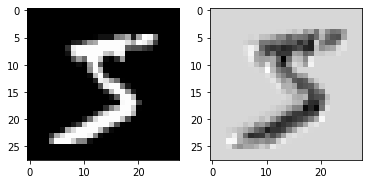

In [36]:
plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(1, 2, 2)
plt.imshow(output[0, :, :, 0], 'gray')

weight 불러오기

- layer.get_weights()

In [37]:
weight = layer.get_weights()

In [38]:
weight

[array([[[[ 0.15290767, -0.1675113 ,  0.2952866 ]],
 
         [[-0.35092637, -0.04656175, -0.3776273 ]],
 
         [[ 0.03278607, -0.16184042,  0.0031147 ]]],
 
 
        [[[-0.14054862, -0.1308083 ,  0.03903911]],
 
         [[-0.08567795, -0.13724247,  0.3759569 ]],
 
         [[ 0.20488131, -0.02030942,  0.04181838]]],
 
 
        [[[-0.3929797 ,  0.24902987,  0.26516432]],
 
         [[ 0.11294949, -0.04305947,  0.18205297]],
 
         [[-0.11239982, -0.34770784, -0.01199204]]]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [39]:
len(weight)

2

In [40]:
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

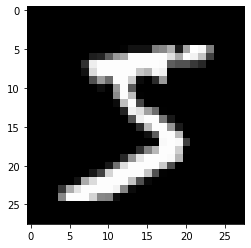

In [41]:
plt.imshow(image[0, :, :, 0], 'gray')

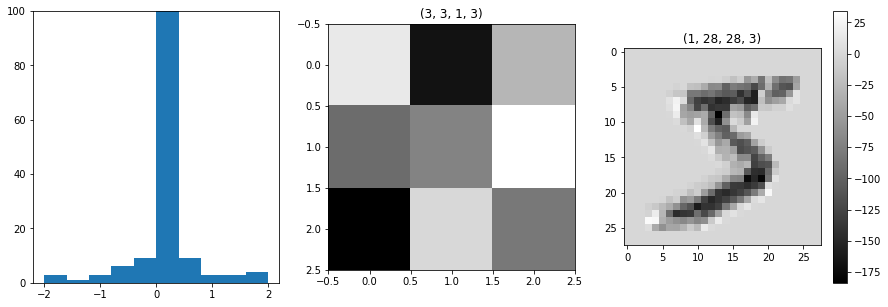

In [42]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:, :, 0, 0], 'gray')

plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()

In [43]:
np.min(output), np.max(output)

(-243.31546, 240.02179)

## Activation Function

![relu](image/activation.png)

In [44]:
tf.keras.layers.ReLU()

In [45]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [46]:
output.shape

TensorShape([1, 28, 28, 3])

In [47]:
np.min(act_output), np.max(act_output)

(0.0, 240.02179)

In [48]:
act_output

<tf.Tensor: id=118, shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]

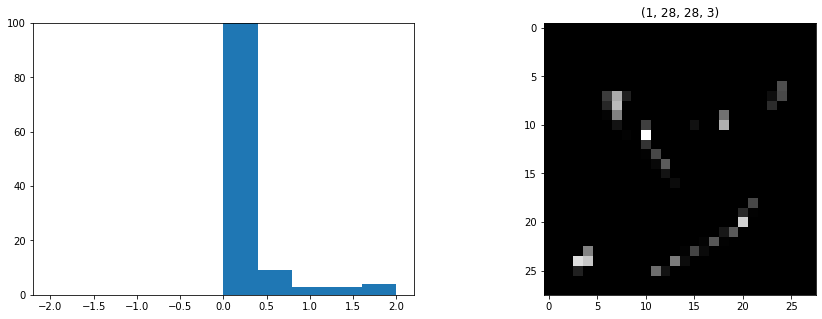

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')

## Pooling

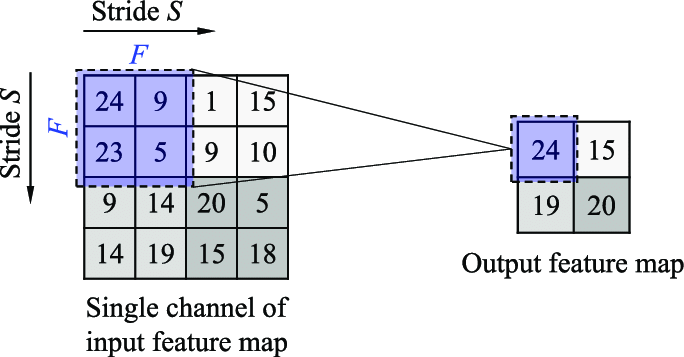

- tf.keras.layers.MaxPool2D

In [50]:
tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [51]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)

In [52]:
act_output.shape

TensorShape([1, 28, 28, 3])

In [53]:
pool_output.shape

TensorShape([1, 14, 14, 3])

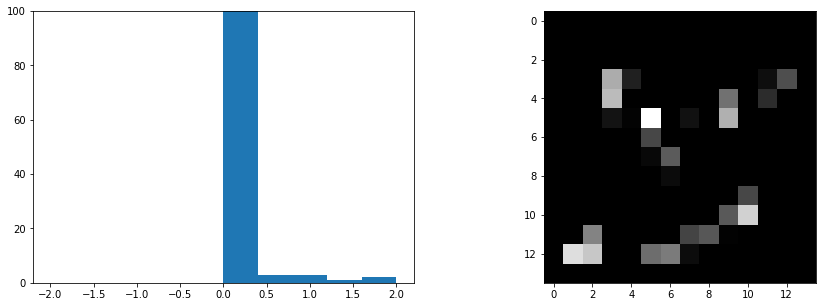

In [54]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(122)
plt.imshow(pool_output[0,:, :, 0], 'gray')

# Fully Connected

![fully connected](image/fc.png)

y = wX + b

## Flatten

![flatten](image/flatten.png)

- tf.keras.layers.Flatten()

In [56]:
tf.keras.layers.Flatten()

In [57]:
layer = tf.keras.layers.Flatten()

In [58]:
flatten = layer(output)

In [59]:
flatten.shape

TensorShape([1, 2352])

In [60]:
output.shape

TensorShape([1, 28, 28, 3])

In [61]:
28*28*3

2352

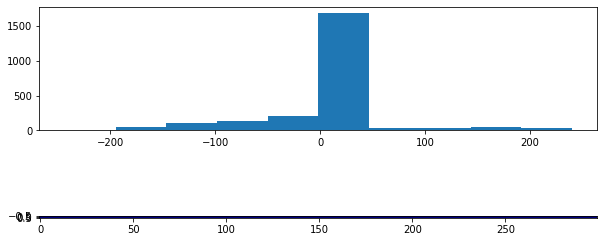

In [66]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())

plt.subplot(212)
plt.imshow(flatten[:, :300], 'jet')

## Dense

![Dense](image/dense.png)

- tf.keras.layers.Dense

In [67]:
tf.keras.layers.Dense(32, activation='relu')

In [68]:
layer = tf.keras.layers.Dense(32, activation='relu')

In [69]:
output = layer(flatten)

In [70]:
output.shape

TensorShape([1, 32])

In [71]:
output

<tf.Tensor: id=168, shape=(1, 32), dtype=float32, numpy=
array([[  0.      , 152.66393 ,   0.      ,   0.      ,  79.18209 ,
         19.84162 ,  35.816547,  32.067444,   0.      ,  53.22488 ,
          0.      ,  69.70434 ,   0.      ,   0.      ,   0.      ,
         71.44852 , 132.30383 ,  64.85093 ,  23.222338,   0.      ,
        120.50575 , 113.35302 ,   0.      ,  55.439816,   0.      ,
          0.      , 180.05292 ,  88.65309 ,   0.      ,   0.      ,
          0.      ,  73.4124  ]], dtype=float32)>

In [73]:
layer_2 = tf.keras.layers.Dense(10, activation='relu')
output_example = layer_2(output)

In [74]:
output_example.shape

TensorShape([1, 10])

## DropOut

![dropout](image/dropout.png)

- tf.keras.layers.Dropout

In [75]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [77]:
output.shape

TensorShape([1, 32])

# Build Model

![model](image/model.png)

In [84]:
from tensorflow.keras import layers

In [85]:
input_shape = (28, 28, 1)
num_classes = 10

In [88]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction
# Conv block
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D()(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D()(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [89]:
model

## Summary

In [91]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0 